In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date',parse_dates=True)

In [53]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns =['aapl','cisco','ibm','amzn' ]

In [54]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


Mean daily return: 

In [55]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

Correalation: 

In [56]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


LOG RETURN: 

In [57]:
#compare: 
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [58]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


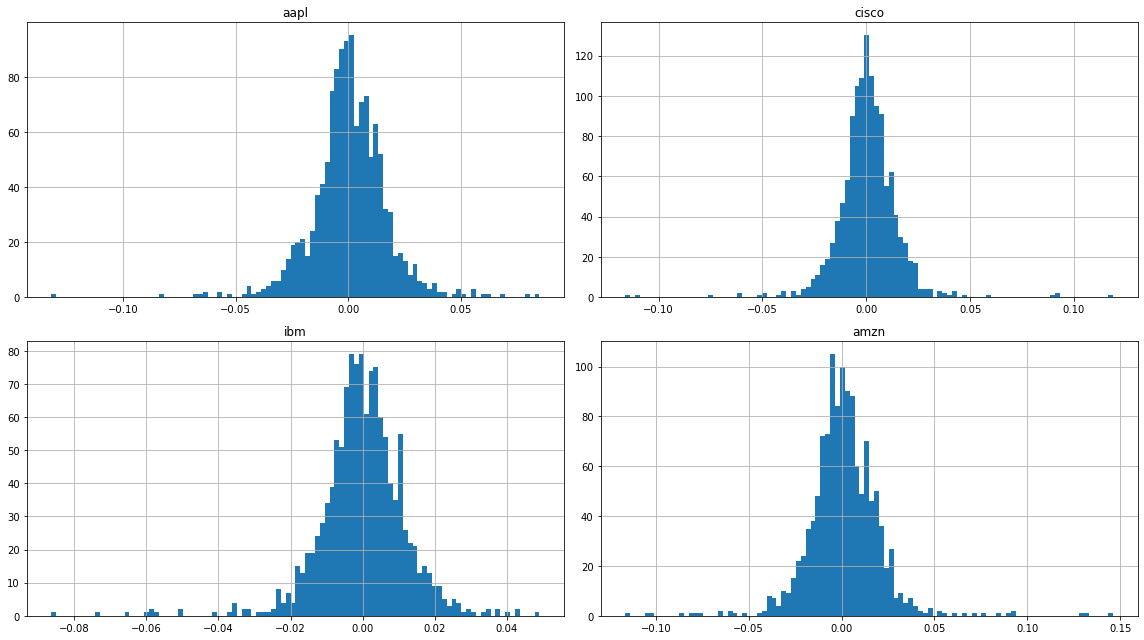

In [59]:
log_returns.hist(bins=100,figsize=(16,9))
plt.tight_layout()

In [16]:
log_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [60]:
log_returns.mean()  * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [61]:
log_returns.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


15000 loops
==

In [99]:
np.random.seed(101)
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    #Weights:
    weights = np.array(np.random.random(4))
    # Rebalance weights: 
    weights = weights/np.sum(weights)
    #Save Weights:
    all_weights[ind,:] = weights
    
    #Expected Return:
    ret_arr[ind] = np.sum(log_returns.mean()* weights) *252

    #Expected volatility:
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))

    #SR
    sharpe_arr[ind] =  ret_arr[ind]/vol_arr[ind] 


In [100]:
sharpe_arr.max()

1.0303260551271067

In [101]:
#index location:
sharpe_arr.argmax()

1420

In [102]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [103]:
max_sr_vol = vol_arr[1420]
max_sr_ret = ret_arr[1420]

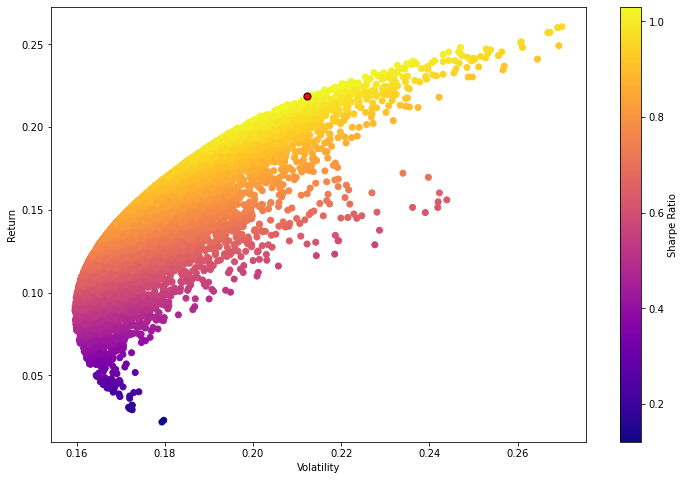

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

Faster :

In [143]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean()* weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])

In [132]:
from scipy.optimize import minimize 

In [133]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [144]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) -1 

In [145]:
cons = ({'type':'eq','fun':check_sum})

In [146]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [147]:
init_guess =[0.25,0.25,0.25,0.25]

In [150]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
opt_results     

     fun: -1.030716870334955
     jac: array([ 5.64455986e-05,  4.18275595e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289778e-01, 2.04189819e-01, 9.24621165e-17, 5.29520404e-01])

In [151]:
opt_results.x

array([2.66289778e-01, 2.04189819e-01, 9.24621165e-17, 5.29520404e-01])

Efficient fontier

In [153]:
frontier_y = np.linspace(0,0.3,100)

In [154]:
def minimize_volatitlity(weights):
    return get_ret_vol_sr(weights)[1]

In [161]:
frontier_volatility = []
for possible_return in frontier_y:
        cons = ({'type':'eq','fun':check_sum},
        {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
        
        result = minimize(minimize_volatitlity,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
        frontier_volatility.append(result['fun'])

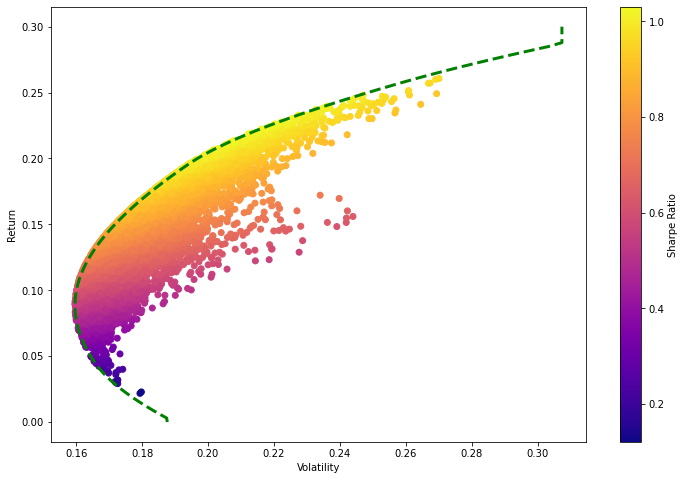

In [164]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)